# AOS 51, Spring 2018, Lab #8

# NetCDF, xarray, cartopy 

So far, we've analyzed a wealth of 1-D and 2-D climate data. Today (and next week), we'll leap into 3D and 4D climate data, which are stored in "netCDF" files. 

---

# What does netCDF mean?

**Net**work **C**ommon **D**ata **F**orm (or [netCDF](https://en.wikipedia.org/wiki/NetCDF)) is a set of software libraries to manipulate array-oriented (i.e. multi-dimensional) weather and climate data. netCDF files all end with the extension ".nc".

---

# Working with netCDF files in Python

The most recent and powerful Python package to work with netCDF files is called [xarray](https://xarray.pydata.org/en/stable/).

Let's import xarray and rename the package to "xr". 

In [11]:
import xarray as xr

# Opening and reading netCDF files

We'll be working with a file called "air_2m_mon_mean_1998_2017.nc". This file is from the [NCEP-DOE 2 Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.gaussian.html) and contains global monthly-mean near-surface air temperature from January 1998 - December 2017.

Download this file from the shared AOS51 Data google drive folder and upload it in the "Files" tab in JupyterHub. 

We can read in the file and store the contents as an xarray Dataset (ds) with:

In [14]:
ds = xr.open_dataset('skt_sfc_mon_mean_1998_2017.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 240)
Coordinates:
  * lat        (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    skt        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:               CF-1.0
    title:                     Monthly NCEP/DOE Reanalysis 2
    history:                   Thu May 17 17:38:09 2018: ncpdq -a -lat skt_sf...
    comments:                  Data is from \nNCEP/DOE AMIP-II Reanalysis (Re...
    platform:                  Model
    source:                    NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:               National Centers for Environmental Prediction
    dataset_title:             NCEP-DOE AMIP-II Reanalysis
    References:      

What do we see?

Data in netCDF files are divided by dimension, variables, and attributes (plus coordinates, though these are of secondary importance to us for now). 

---

# Extracting variables

We can extract variables from an xarray Dataset with similar syntax as extracting columns from a Pandas Dataframe.

Note how the data format changes from a Dataset (multiple variables) to a DataArray (single variable). 

In [17]:
skt = ds['skt'] #skin temperature 
skt

<xarray.DataArray 'skt' (time: 240, lat: 94, lon: 192)>
[4331520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean 

---
** In-class exercise **

Extract latitude from the Dataset and print its contents. 

What are the units and min/max values of lat? (Note: you do not need to use any functions to determine the min/max.)

---

# Subsetting data

There are 3 ways to subset data contained in a Dataset.

## 1. Regular Python indexing

Knowing that `skt` has three dimensions [time x lat x lon], we can access an individual index or range of indices in these dimensions with:

In [19]:
# E.g. first lat, lon, and time index
ds['skt'][0,0,0]

# E.g. first 10 time indices, lat indices 55-56 (57 is not included!), and lon index of 100
ds['skt'][0:10,55:57,100]

<xarray.DataArray 'skt' (time: 10, lat: 2)>
array([[ 299.169983,  298.899994],
       [ 298.799988,  298.459991],
       [ 299.209991,  298.959991],
       [ 298.690002,  298.459991],
       [ 298.679993,  298.47998 ],
       [ 299.47998 ,  299.429993],
       [ 299.929993,  299.959991],
       [ 300.279999,  300.25    ],
       [ 300.720001,  300.580017],
       [ 300.599976,  300.410004]], dtype=float32)
Coordinates:
  * lat      (lat) float32 16.1902 18.095
    lon      float32 187.5
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE 

## 2. Selecting by index (isel)

Just as we did with Pandas, we can use the `isel` command to subset data by index. Exact same logic as the regular Python indexing, but we can specify dimension names now:

In [7]:
# Subset time index 0, lat index 50, lon index 75
ds['skt'].isel(time=0, lat=50, lon=75)

# Subset slices of time indices 100-104, lat 20-22, lon 100-104 
ds['skt'].isel(time=slice(100,105), lat=slice(20,23), lon=slice(100,105))

<xarray.DataArray 'skt' ()>
array(301.489990234375, dtype=float32)
Coordinates:
    lat      float32 6.66657
    lon      float32 140.625
    time     datetime64[ns] 1998-01-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean (monthly of 6-hourly values)

## 3. Selecting by label (sel)

Frankly, the best part of xarray is that we don't need to subset by index, rather we can subset using dimension names and values.  This is accomplished using the `sel` command. 

In [9]:
# Select a single time:
ds['skt'].sel(time='2005-06')

<xarray.DataArray 'skt' (time: 1, lat: 94, lon: 192)>
array([[[ 227.429993,  227.300003, ...,  227.699997,  227.559998],
        [ 229.279999,  229.      , ...,  229.880005,  229.569992],
        ..., 
        [ 271.97998 ,  271.98999 , ...,  271.910004,  271.950012],
        [ 271.869995,  271.869995, ...,  271.859985,  271.859985]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2005-06-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/D

In [10]:
# Select a single time, lat, and lon
# Note how we need to include the method='nearest' argument, e.g. find the grid cell nearest to 37 degN, 235 degE
ds['skt'].sel(time='2010-01', lat=37, lon=235, method='nearest')

<xarray.DataArray 'skt' (time: 1)>
array([ 286.26001], dtype=float32)
Coordinates:
    lat      float32 37.1422
    lon      float32 234.375
  * time     (time) datetime64[ns] 2010-01-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean (monthly of 6-hourly values)

In [18]:
# Select a slice of labels 
# Now, we don't need to include the method='nearest' command when slicing a range of lat/lon labels
ds['skt'].sel(time=slice('2010-01','2014-12'), lat=slice(25,45))

<xarray.DataArray 'skt' (time: 60, lat: 11, lon: 192)>

[126720 values with dtype=float32]

Coordinates:

  * lat      (lat) float32 25.7139 27.6186 29.5234 31.4281 33.3328 35.2375 ...

  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...

  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...

Attributes:

    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...

    valid_range:           [-32765  -1765]

    unpacked_valid_range:  [ 120.  430.]

    actual_range:          [ 190.85420227  314.58322144]

    units:                 degK

    precision:             2

    GRIB_id:               11

    GRIB_name:             TMP

    var_desc:              Skin Temperature

    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...

    level_desc:            Surface

    statistic:             Individual Obs

    parent_stat:           Other

    standard_name:         temperature

    cell_method

In [20]:
# Select a slice of times and a single lat/lon 
# Need to do this in two selecting commands:
ds['skt'].sel(time=slice('2010-01','2014-12')).sel(lat=45.1, lon=200.5, method='nearest')

<xarray.DataArray 'skt' (time: 60)>

array([ 280.73999 ,  280.330017,  280.080017,  280.109985,  280.660004,

        282.049988,  286.5     ,  289.48999 ,  290.27002 ,  285.119995,

        282.470001,  281.529999,  280.669983,  280.690002,  280.429993,

        280.649994,  281.399994,  282.910004,  288.039978,  292.220001,

        288.539978,  285.640015,  284.27002 ,  283.220001,  281.570007,

        281.160004,  280.589996,  280.369995,  281.      ,  281.919983,

        286.299988,  288.339996,  288.880005,  285.059998,  283.429993,

        282.099976,  281.      ,  280.869995,  280.52002 ,  281.209991,

        283.089996,  284.109985,  287.02002 ,  289.419983,  288.959991,

        287.700012,  285.859985,  284.619995,  283.190002,  281.789978,

        281.089996,  281.179993,  281.399994,  283.649994,  285.720001,

        288.119995,  289.459991,  287.179993,  283.899994,  282.029999], dtype=float32)

Coordinates:

    lat      float32 44.7611

    lon      float32 200.62

---
**In-class exercise**

1. Subset 2000-2005 skin temperature at the grid cell nearest to Seattle, WA (47.6 N, 237.7 E).
2. Subset November 1999 skin temperature for latitude nearest to 35 degrees N and all longitudes. 
3. Subset 2015-2017 skin temperature for latitudes within 10-20 degrees N and longitude 90-130 degrees E. 
---

# Arithmetic/Statistics

Like Pandas, we can quickly compute the mean, min, max, standard deviation, etc., of Datasets.

In [20]:
# Average across all dimensions (empty parentheses)
ds['skt'].mean()

# Average across a specific dimension: .mean(dim=['name of dimension'])
ds['skt'].mean(dim='time')

# Maximums across the lat and lon dimensions
ds['skt'].max(dim='lat').max(dim='lon')

# Minimum across the entire time series for a subsetted location (Seattle)
ds['skt'].sel(lat=47.6, lon=237.7, method='nearest').min(dim='time')

<xarray.DataArray 'skt' ()>
array(270.17999267578125)
Coordinates:
    lat      float32 46.6658
    lon      float32 238.125

We can also perform regular arithmetic on variables, with similar syntax to Pandas:

In [33]:
# Convert from Kelvin to Celsius, and assign to new variable with new units
skt_C = ds['skt'] - 273.15
skt_C.attrs['units'] = 'degC'
skt_C

<xarray.DataArray 'skt' (time: 240, lat: 94, lon: 192)>
array([[[-27.75    , -27.889999, ..., -27.479996, -27.619995],
        [-26.87999 , -27.229996, ..., -26.159988, -26.519989],
        ..., 
        [-28.179993, -28.169998, ..., -28.009995, -28.089996],
        [-27.909988, -27.809998, ..., -27.73999 , -27.75    ]],

       [[-37.799988, -37.979996, ..., -37.419998, -37.610001],
        [-34.940002, -35.369995, ..., -34.099991, -34.519989],
        ..., 
        [-33.62999 , -33.289993, ..., -33.769989, -33.709991],
        [-35.019989, -34.539993, ..., -34.479996, -34.48999 ]],

       ..., 
       [[-35.369995, -35.479996, ..., -35.149994, -35.259995],
        [-34.009995, -34.289993, ..., -33.459991, -33.73999 ],
        ..., 
        [-17.699997, -17.610001, ..., -17.98999 , -17.949997],
        [-19.459991, -19.159988, ..., -19.23999 , -19.48999 ]],

       [[-28.449997, -28.519989, ..., -28.309998, -28.37999 ],
        [-26.409988, -26.550003, ..., -26.139999, -26.279999],
 

### Advanced statistics using xarray reduce and where

We can also "reduce" a Dataset/DataArray to its mean, min/max, median, etc., or compute a certain percentile, for example:

In [111]:
import numpy as np

# Reduce to the time-average 
mean_skt = skt.reduce(np.mean, dim='time')

# Reduce to the 75th percentile 
skt_75th = skt.reduce(np.nanpercentile, dim='time', q=75)

We can also use the "where" and "count" functions for efficient counting of values above a certain thresholds:

In [146]:
# Number of months over LA with average temp above the 85th percentile
la_skt = skt.sel(lat=34.05, lon=241.8, method='nearest')
la_skt_85th = la_skt.reduce(np.nanpercentile, dim='time', q=85)
la_skt.where(la_skt > la_skt_85th).count('time').values

array(36)

---
**In-class exercise**

Convert `skt` to degrees F and compute the 95th percentile of temperature during 2000-2010 for Paris, France (48.9 N, 2.4 E).

Note: T(F) = T(K) * (9.5) - 459.67

---

# Simple xarray plotting

xarray also has simple, yet powerful, [plotting capabilities](https://xarray.pydata.org/en/stable/plotting.html) build on top of matplotlib. 

Now we get to play around with [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

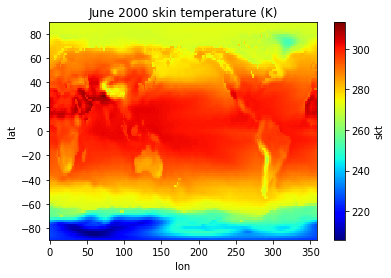

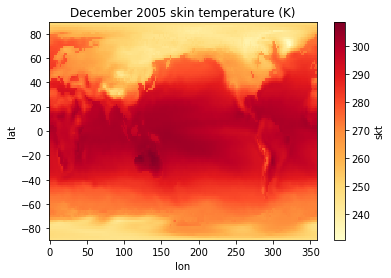

In [50]:
# Skin temperature map on 2000-06-01
ds['skt'].sel(time='2000-06-01').plot(cmap='jet')
plt.title('June 2000 skin temperature (K)')
plt.show()

# Skin temperature map on 2005-12-01
ds['skt'].sel(time='2005-12-01').plot(cmap='YlOrRd')
plt.title('December 2005 skin temperature (K)')
plt.show()

Text(0.5,1,'1998-2017 zonal average skin temperature')

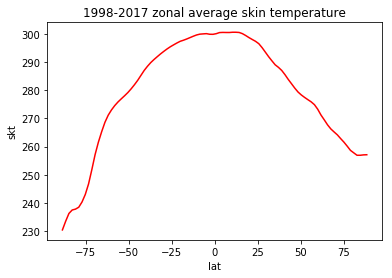

In [53]:
# Time-average, zonal-average skin temperature 
ds['skt'].mean(dim='time').mean(dim='lon').plot(color='red')
plt.title('1998-2017 zonal average skin temperature')

---
** In-class exercise **

Plot the global standard deviation (the command is `std` for xarray, not `stdv`) of skin temperature. 

   Which regions experience the most variable temperature? Why? 

---

# Resampling and Groupby

In [25]:
# Resample monthly to annual data and compute annual-means
skt.resample(time='AS').mean(dim='time')

<xarray.DataArray 'skt' (time: 20, lat: 94, lon: 192)>
array([[[ 229.554993,  229.385849, ...,  229.896667,  229.72583 ],
        [ 231.493347,  231.104172, ...,  232.280823,  231.886673],
        ..., 
        [ 256.226624,  255.869156, ...,  256.215851,  256.2258  ],
        [ 255.885864,  255.646667, ...,  255.669998,  255.669174]],

       [[ 229.291687,  229.111679, ...,  229.645828,  229.467484],
        [ 231.484146,  231.09082 , ...,  232.268356,  231.875839],
        ..., 
        [ 257.089996,  257.004181, ...,  257.009979,  257.053314],
        [ 256.615021,  256.749176, ...,  256.729156,  256.415802]],

       ..., 
       [[ 230.455856,  230.307495, ...,  230.748337,  230.601669],
        [ 232.018356,  231.640823, ...,  232.786682,  232.397507],
        ..., 
        [ 259.7883  ,  259.863373, ...,  259.60498 ,  259.659119],
        [ 259.640839,  259.742493, ...,  259.706665,  259.630005]],

       [[ 228.914993,  228.73584 , ...,  229.277512,  229.095825],
        [ 230

Additionally, xarray has a special command called [Groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html) that can quickly create annual and seasonal averages (or min, max, median, standard deviation, etc.)...and many other types of averages.

The seasons are defined as DJF, MAM, JJA, SON. 

In [27]:
# Annual means
# Note the *new dimension* called year (came from the old time dimension)
skt.groupby('time.year').mean(dim='time')

<xarray.DataArray 'skt' (year: 20, lat: 94, lon: 192)>
array([[[ 229.554993,  229.385849, ...,  229.896667,  229.72583 ],
        [ 231.493347,  231.104172, ...,  232.280823,  231.886673],
        ..., 
        [ 256.226624,  255.869156, ...,  256.215851,  256.2258  ],
        [ 255.885864,  255.646667, ...,  255.669998,  255.669174]],

       [[ 229.291687,  229.111679, ...,  229.645828,  229.467484],
        [ 231.484146,  231.09082 , ...,  232.268356,  231.875839],
        ..., 
        [ 257.089996,  257.004181, ...,  257.009979,  257.053314],
        [ 256.615021,  256.749176, ...,  256.729156,  256.415802]],

       ..., 
       [[ 230.455856,  230.307495, ...,  230.748337,  230.601669],
        [ 232.018356,  231.640823, ...,  232.786682,  232.397507],
        ..., 
        [ 259.7883  ,  259.863373, ...,  259.60498 ,  259.659119],
        [ 259.640839,  259.742493, ...,  259.706665,  259.630005]],

       [[ 228.914993,  228.73584 , ...,  229.277512,  229.095825],
        [ 230

In [29]:
# Seasonal means
# Note the *new dimension* called season (came from old dimension of time)
skt.groupby('time.season').mean(dim='time')

<xarray.DataArray 'skt' (season: 4, lat: 94, lon: 192)>
array([[[ 240.672363,  240.536636, ...,  240.948807,  240.809677],
        [ 242.376465,  242.044327, ...,  243.048508,  242.710693],
        ..., 
        [ 246.949799,  247.030823, ...,  246.83316 ,  246.947723],
        [ 246.211212,  246.405182, ...,  246.361679,  246.160324]],

       [[ 222.361069,  222.170639, ...,  222.737778,  222.5495  ],
        [ 224.456146,  224.025146, ...,  225.316833,  224.88649 ],
        ..., 
        [ 271.580139,  271.600494, ...,  271.562012,  271.579834],
        [ 271.607971,  271.669312, ...,  271.65799 ,  271.604492]],

       [[ 224.402328,  224.190979, ...,  224.822296,  224.613907],
        [ 226.701553,  226.214661, ...,  227.667023,  227.187103],
        ..., 
        [ 254.231796,  254.262497, ...,  254.168854,  254.254654],
        [ 254.040985,  254.142868, ...,  254.114838,  254.016632]],

       [[ 228.644669,  228.473846, ...,  228.987793,  228.815536],
        [ 230.367981,  22

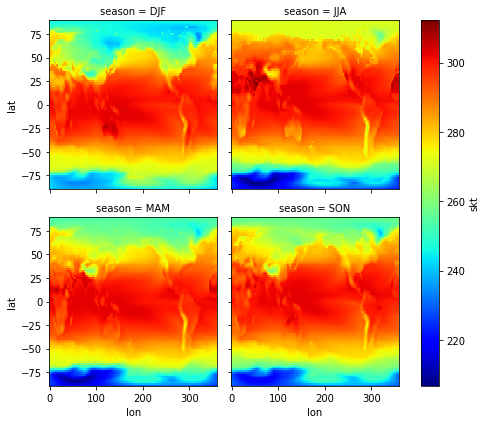

In [32]:
# Easy to plot the 4 seasons using simple xarray plotting function with wrapped columns
skt.groupby('time.season').mean('time').plot(cmap='jet', col='season', col_wrap=2)

# Fancy maps using cartopy

Xarray maps are intended for quick and dirty looks at spatial data. For high quality maps, we'll turn to [cartopy](https://scitools.org.uk/cartopy/docs/latest/).

Let's import matplotlib and two modules of cartopy (crs and featrure):

In [89]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

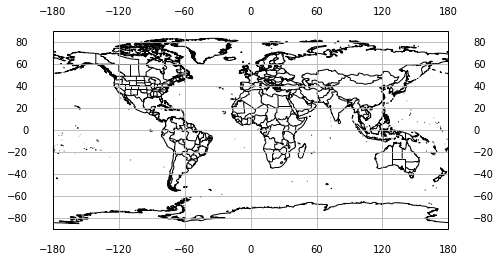

In [90]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Most basic map: no data, just display the PlateCarree projection 
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m') #can be 110, 50, or 10m resolution; can also specify the color 
ax.gridlines(draw_labels=True)
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)

### Contouring and filling data over the map (contourf)

Text(0.5,1,'SKT contours')

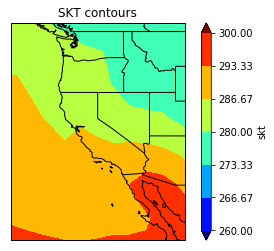

In [91]:
skt_avg = skt.mean(dim='time')

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
skt_avg.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', vmin=260, vmax=300)
ax.set_extent([230,250,25,50]) # zoom in over the Western US
ax.coastlines('50m')
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.set_title('SKT contours')

### Grid-cell colormesh over the map (pcolormesh)

Text(0.5,1,'SKT colormesh')

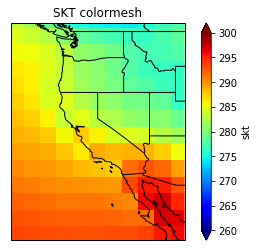

In [92]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
skt_avg.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', vmin=260, vmax=300)
ax.set_extent([230,250,25,50]) # zoom in over the Western US
ax.coastlines('50m')
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.set_title('SKT colormesh')

### Multi-panels

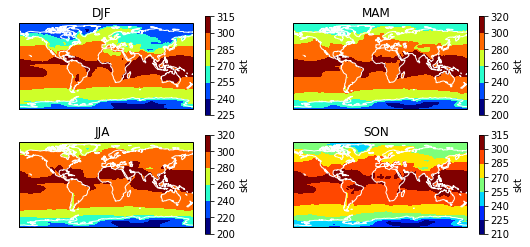

In [105]:
skt_seasonal_mean = skt.groupby('time.season').mean(dim='time')

fig = plt.figure(figsize=(9,4))

ax1 = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
skt_seasonal_mean.sel(season='DJF').plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), cmap='jet')
ax1.coastlines(color='white')
ax1.set_title('DJF')

ax2 = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
skt_seasonal_mean.sel(season='MAM').plot.contourf(ax=ax2, transform=ccrs.PlateCarree(), cmap='jet')
ax2.coastlines(color='white')
ax2.set_title('MAM')

ax3 = fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
skt_seasonal_mean.sel(season='JJA').plot.contourf(ax=ax3, transform=ccrs.PlateCarree(), cmap='jet')
ax3.coastlines(color='white')
ax3.set_title('JJA')

ax4 = fig.add_subplot(2,2,4, projection=ccrs.PlateCarree())
skt_seasonal_mean.sel(season='SON').plot.contourf(ax=ax4, transform=ccrs.PlateCarree(), cmap='jet')
ax4.coastlines(color='white')
ax4.set_title('SON')
plt.show()

---
**In-class exercise**

* Count the number of years that had annual-mean temperatures above the 2017 average for each grid cell across the earth.
* Make a global map of this count
* Visually, how can you tell if 2017 was one of the hottest years across the US for the past 20 years?

---

---
** In-class exercise **

Download the file called "dswrf_sfc_mon_mean_1998_2017.nc" from the google drive. 

This file contains global monthly downward shortwave radiation from 1998-2017.

Compute seasonal-means across the globe and plot the values. 

---